In [2]:
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install networkx

In [3]:
print('Cambios realizados')

Cambios realizados


In [1]:
import networkx as nx
import warnings
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
warnings.filterwarnings('ignore')
%matplotlib inline

## Cargando el archivo del 2019

In [2]:
df_2019 = pd.read_csv('data/traslados_2019_tp2_3_lima.csv')
df_2019

,COD_MOD,COD_MOD_DESTINO,WEIGHT
0,1038199,411504,1
1,503052,411504,1
2,826263,416057,2
3,1053818,411736,1
4,482042,411736,1
...,...,...,...
178899,328955,281972,1
178900,1531367,679472,1
178901,286427,1064120,1
178902,743716,636837,2


## Cargando el archivo del 2020

In [3]:
df_2020 = pd.read_csv('data/traslados_2020_tp2_3_lima.csv')
df_2020

,COD_MOD,COD_MOD_DESTINO,WEIGHT
0,900993,416073,1
1,1010354,417758,1
2,649731,577346,1
3,1521236,577346,1
4,436162,412635,1
...,...,...,...
204313,332247,1342724,1
204314,320408,1342724,1
204315,826354,1342724,1
204316,1501709,1342724,1


## Cargando el archivo de labels

In [4]:
df_labels = pd.read_csv('data/traslados_ie_labels_2.csv', encoding='Windows-1252', usecols=lambda col: col != 13)
df_labels

,COD_MOD,ANEXO,D_DPTO,D_PROV,D_DIST,D_REGION,D_DREUGEL,GESTION,D_NIV_MOD,NOMBRE_IE,NLONG_IE,NLAT_IE
0,415547,0,ANCASH,HUARAZ,INDEPENDENCIA,DRE ANCASH,UGEL HUARAZ,PUBLICO,Inicial - Jardín,123,-77.531910,-9.51885
1,415638,0,ANCASH,HUARAZ,HUARAZ,DRE ANCASH,UGEL HUARAZ,PUBLICO,Inicial - Jardín,122,-77.531960,-9.53067
2,415646,0,ANCASH,HUARAZ,HUARAZ,DRE ANCASH,UGEL HUARAZ,PUBLICO,Inicial - Jardín,233,-77.522700,-9.5311
3,415877,0,ANCASH,HUARAZ,INDEPENDENCIA,DRE ANCASH,UGEL HUARAZ,PRIVADO,Inicial - Jardín,COLEGIO PARROQUIAL NUESTRA SEÑORA DEL SAGRADO ...,-77.531481,-9.516673
4,567206,0,ANCASH,HUARAZ,INDEPENDENCIA,DRE ANCASH,UGEL HUARAZ,PUBLICO,Inicial - Jardín,268,-77.504026,-9.51394
...,...,...,...,...,...,...,...,...,...,...,...,...
173899,1794734,0,CAJAMARCA,CONTUMAZA,CONTUMAZA,DRE CAJAMARCA,UGEL CONTUMAZÁ,PUBLICO,Primaria,211,-78.652450,-7.34258
173900,1794742,0,HUANCAVELICA,HUAYTARA,SAN FRANCISCO DE SANGAYAICO,DRE HUANCAVELICA,UGEL HUAYTARÁ,PUBLICO,Secundaria,22586,-74.971787,-13.59848
173901,3007085,0,AMAZONAS,BAGUA,IMAZA,DRE AMAZONAS,UGEL IBIR-IMAZA,PUBLICO,Inicial - Jardín,451,-78.187444,-4.844992
173902,3007093,0,AMAZONAS,BAGUA,IMAZA,DRE AMAZONAS,UGEL IBIR-IMAZA,PUBLICO,Primaria,17901,-78.367603,-5.111024


## Crear el grafo dirigido con los archivos del 2019 y 2020

In [9]:
G1 = nx.DiGraph()

for i in range(df_2019.shape[0]):
    f = df_2019.iloc[i,:].values
    f = f[~pd.isnull(f)]
    G1.add_edge(f[0], f[1], weight=f[2])

for i in range(df_2020.shape[0]):
    f = df_2020.iloc[i,:].values
    f = f[~pd.isnull(f)]
    G1.add_edge(f[0], f[1], weight=f[2])

In [10]:
print('Cantidad de Colegios:',len(G1.nodes()))
print('Cantidad de Conexiones:',len(G1.edges()))

Cantidad de Colegios: 27583
Cantidad de Conexiones: 349505


## Analizando la naturaleza del grafo

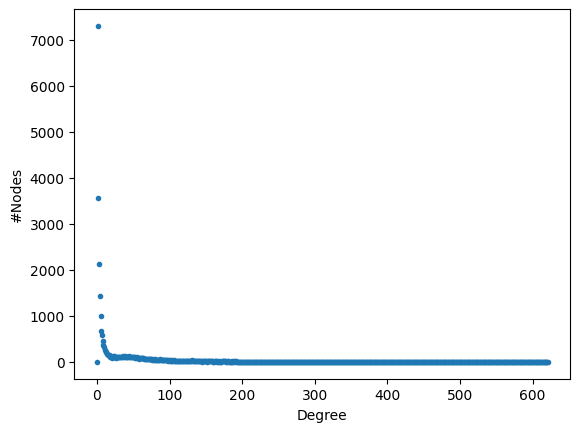

In [11]:
hist = nx.degree_histogram(G1)

plt.plot(range(0, len(hist)), hist, '.')
plt.xlabel('Degree')
plt.ylabel('#Nodes')
#plt.loglog()
plt.show()

## Agregando etiquetas al grafo

In [12]:
#dic_colegios = {}
#colegios_existentes = 0
#colegios_no_existentes = 0
for i in range(df_labels.shape[0]):
    f = df_labels.iloc[i,:].values
    f = f[~pd.isnull(f)]
    if G1.has_node(f[0]):
        #if(f[3] == 'LIMA'):
        G1.add_node(f[0], departamento=f[2], provincia=f[3], distrito=f[4], region=f[5], ugel=f[6], gestion=f[7], modalidad=f[8], label=f[9], nombre=f[9], lon=f[10], lat=f[11])
        #else:
        #G1.remove_node(f[0])
        #print('0:', f[0],'1:', f[1],'2:', f[2],'3:', f[3],'4:', f[4],'5:', f[5],'6:', f[6],'7:', f[7],'8:', f[8],'9:', f[9],'10:', f[10])
        #colegios_existentes += 1
    #else:
    #colegios_no_existentes += 1
    #print(f)
    #G1.add_edge(f[0], f[1], weight=f[2])

#print('cantidad de existentes:', colegios_existentes, ', no existentes:', colegios_no_existentes)

In [14]:
# exportando grafo
nx.write_graphml(G1, 'out/colegios_2019_2020.graphml')

# Calculando las metricas de centralidad

## Degree Centrality

In [16]:
degrees = dict(G1.degree()) # calcular los grados como diccionario

In [17]:
ranks_degree_G1 = [(k,v) for k,v in sorted(degrees.items(), key=lambda item:-item[1])]
lista_ranks_degree = {G1.nodes()[n]['nombre']:v for n,v in ranks_degree_G1[:5]} #top 5 según grado
print(lista_ranks_degree)

{'TRILCE LOS OLIVOS': 621, '3057 SANTA ROSA DE CARABAYLLO': 597, 'TERESA GONZALES DE FANNING': 525, 'MERCEDES CABELLO DE CARBONERA': 493, 'TRILCE SALAVERRY': 491}


## Closeness Centrality

In [18]:
closeness = nx.closeness_centrality(G1) # calcular la centralidad de cercania de todos los nodos

In [19]:
ranks_closeness_G1 = [(k,v) for k,v in sorted(closeness.items(), key=lambda item:-item[1])]
lista_ranks_closeness = {G1.nodes()[n]['nombre']:v for n,v in ranks_closeness_G1[:5]} #top 5 según grado
print(lista_ranks_closeness)

{'CORONEL BRUNO TERREROS BALDEON': 0.095778334525857, 'DIONISIO MANCO CAMPOS': 0.0922943451668057, '3057 SANTA ROSA DE CARABAYLLO': 0.09146334453309829, 'TERESA GONZALES DE FANNING': 0.09028713902105495, '2038 INCA GARCILASO DE LA VEGA': 0.08659820482459583}


## Betweeness centrality

In [20]:
betweeness = nx.betweenness_centrality(G1) # calcular la centralidad de intermediarios de todos los nodos

In [21]:
ranks_betweeness_G1 = [(k,v) for k,v in sorted(betweeness.items(), key=lambda item:-item[1])]
lista_ranks_betweenness = {G1.nodes()[n]['nombre']:v for n,v in ranks_betweeness_G1[:5]} #top 5 según grado
print(lista_ranks_betweenness)

{'DIONISIO MANCO CAMPOS': 0.07577448151070064, 'JOSE ABELARDO QUIÑONES': 0.07557541286588924, '21015': 0.01940713475856744, 'SACRO COURE': 0.012568909554870005, 'AUGUSTO B. LEGUIA': 0.009327122938337649}


## Harmonic Centrality

In [22]:
harmonic = nx.harmonic_centrality(G1) # calcular la centralidad harmonica de todos los nodos

In [23]:
ranks_harmonic_G1 = [(k,v) for k,v in sorted(harmonic.items(), key=lambda item:-item[1])]
lista_ranks_harmonic = {G1.nodes()[n]['nombre']:v for n,v in ranks_harmonic_G1[:5]} #top 5 según grado
print(lista_ranks_harmonic)

{'MILITAR LEONCIO PRADO': 2831.1269841270887, 'DIONISIO MANCO CAMPOS': 2782.6476190475482, 'CORONEL BRUNO TERREROS BALDEON': 2763.835714285668, 'COLEGIO MAYOR SECUNDARIO PRESIDENTE DEL PERU': 2742.076984127094, '3057 SANTA ROSA DE CARABAYLLO': 2726.6500000000706}


## Pagerank Centrality

In [24]:
pagerank = nx.pagerank(G1) # calcular el pagerank de todos los nodos

In [25]:
ranks_pagerank_G1 = [(k,v) for k,v in sorted(pagerank.items(), key=lambda item:-item[1])]
lista_ranks_pagerank = {G1.nodes()[n]['nombre']:v for n,v in ranks_pagerank_G1[:5]} #top 5 según grado
print(lista_ranks_pagerank)

{'3057 SANTA ROSA DE CARABAYLLO': 0.0007477786120327778, 'LUIS FABIO XAMMAR JURADO': 0.0005296402834489942, 'PEAD LICEO NAVAL ALMIRANTE GUISE': 0.0005191053549974533, 'COLEGIO MAYOR SECUNDARIO PRESIDENTE DEL PERU': 0.0004892924948952113, 'MILITAR LEONCIO PRADO': 0.0004887809173439655}


# Preuntas:

### Simule su red con un gráfico aleatorio similar.

In [4]:
!pip install powerlaw

In [5]:
import networkx as nx
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import powerlaw
warnings.filterwarnings('ignore')
%matplotlib inline 

* Cantidad de Colegios: 27583
* Cantidad de Conexiones: 349505

In [ ]:
#crear un grafo ER con 400 nodos y 5% de probabilidad de conexión
er = nx.erdos_renyi_graph(27583, 0.05)
nx.draw(er, node_size=2)